# Advection Equation

Here I solve the advection equation $u_t + a u_x=0$ using as an initial condition a step function: $u(x, t = 0) = 1$ for $x \in [4, 6]$ and $u(x, t = 0) = 0$ in the rest of the domain.

I use a domain $x\in [0,10]$ with periodic boundary conditions.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os

## LAX-FRIEDRICHS

In [19]:
os.makedirs('./LAXF_step/images_step', exist_ok=True)

In [20]:
a=1.0
L = 10.0
nx = 101
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

u_initial = np.heaviside(x-4,1)-np.heaviside(x-6,0)
u_current = u_initial.copy()

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [21]:
t = 0.0
i = 0

plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.savefig('./LAXF_step/images_step/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

while t < t_final:
    
    u_next = (1/2)*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    u_current = u_next.copy()

    t += dt
    i += 1

    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(-0.1,1.1)
        plt.xlabel('x')
        plt.ylabel('u', rotation=0)
        plt.savefig('./LAXF_step/images_step/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


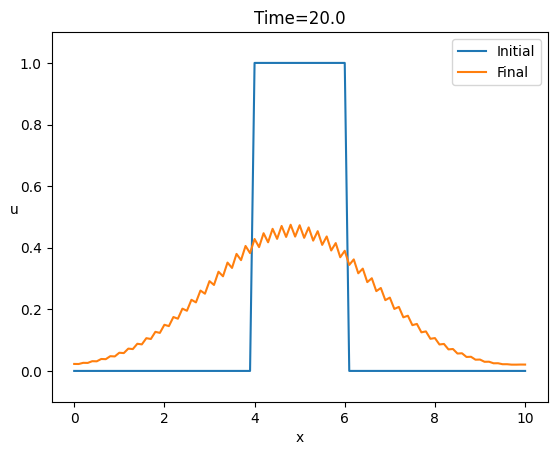

In [22]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.show()

In [23]:
directory = "./LAXF_step/images_step/"
files = os.listdir(directory)
files=sorted(files)

In [24]:
import imageio.v2 as imageio
with imageio.get_writer('./LAXF_step/movie_step.mov', mode='I') as writer:
    for file in files:
        image = imageio.imread('./LAXF_step/images_step/'+file)
        writer.append_data(image)
        
files=[]


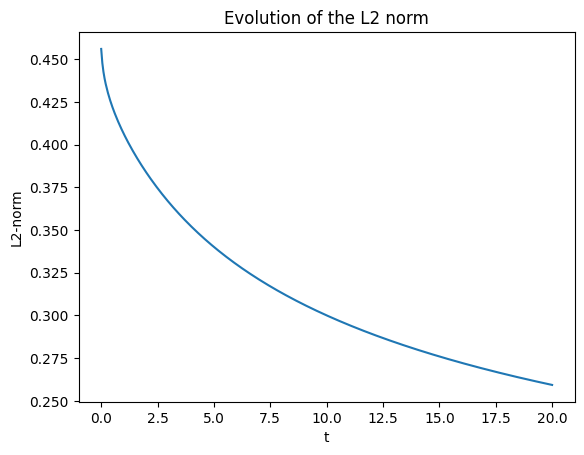

In [25]:
plt.plot(time,l2norm)
plt.title('Evolution of the L2 norm')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXF_step/LAXF_L2.png', dpi=200);

### Changing number of points

In [27]:
L = 10.0
nx = 1001
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

u_initial = np.heaviside(x-4,1)-np.heaviside(x-6,0)
u_current = u_initial.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:  
    u_next = (1/2)*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))   
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 1001
dx= 0.01
dt= 0.005
Number of iterations= 4000.0


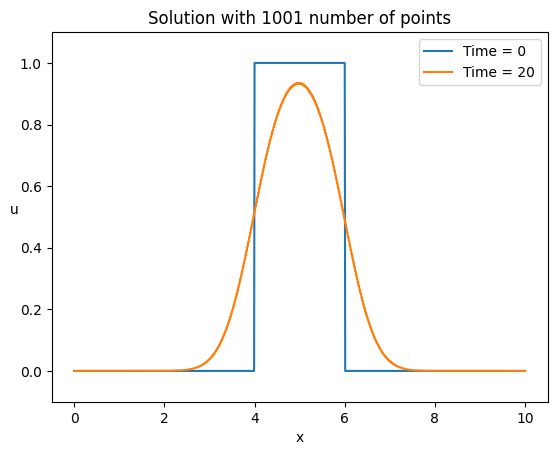

In [28]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with 1001 number of points')
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./LAXF_step/LAXF_sol_1001.png', dpi=200)

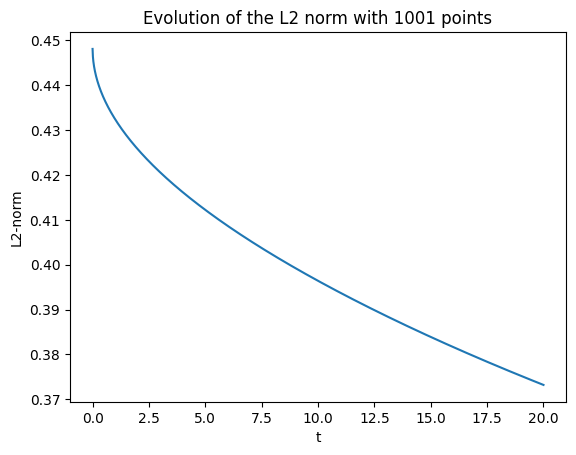

In [29]:
plt.plot(time,l2norm)
plt.title('Evolution of the L2 norm with 1001 points')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXF_step/LAXF_norm_1001.png', dpi=200);

### Changing Courant factor

In [31]:
L = 10.0
nx = 101
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 1.01
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

u_initial = np.heaviside(x-4,1)-np.heaviside(x-6,0)
u_current = u_initial.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:  
    u_next = (1/2)*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))   
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 101
dx= 0.1
dt= 0.101
Number of iterations= 198.019801980198


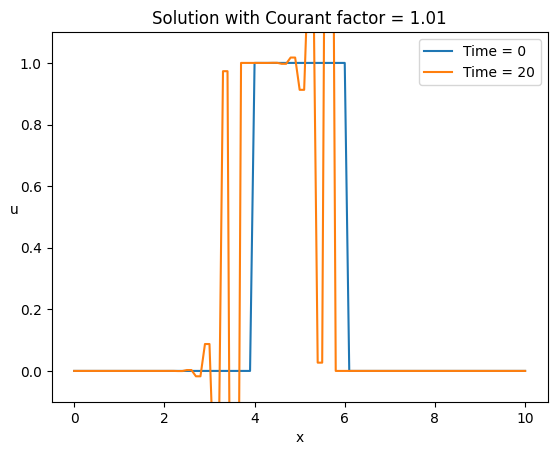

In [32]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with Courant factor = 1.01')
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./LAXF_step/LAXF_sol_cf101.png', dpi=200)

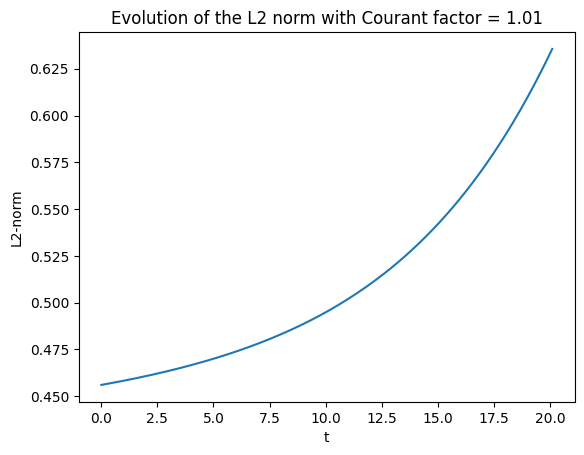

In [33]:
plt.plot(time,l2norm)
plt.title('Evolution of the L2 norm with Courant factor = 1.01')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXF_step/LAXF_norm_cf101.png', dpi=200);

## LAX-WENDROFF

In [40]:
os.makedirs('./LAXW_step/images_step', exist_ok=True)

In [41]:
a=1.0
L = 10.0
nx = 101
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

u_initial = np.heaviside(x-4,1)-np.heaviside(x-6,0)
u_current = u_initial.copy()

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [42]:
t = 0.0
i = 0

plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(-0.3,1.3)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.savefig('./LAXW_step/images_step/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

while t < t_final:
    
    u_next = u_current -a*(dt)/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + (0.5)*((a*(dt)/(dx))**2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))
    u_current = u_next.copy()

    t += dt
    i += 1

    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(-0.3,1.3)
        plt.xlabel('x')
        plt.ylabel('u', rotation=0)
        plt.savefig('./LAXW_step/images_step/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


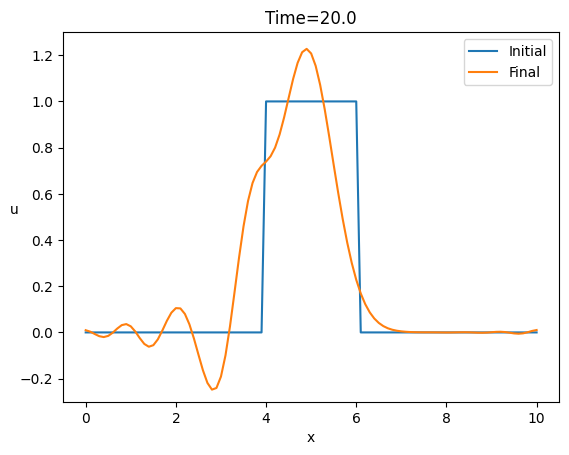

In [43]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(-0.3,1.3)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.show()

In [44]:
directory = "./LAXW_step/images_step/"
files = os.listdir(directory)
files=sorted(files)

In [45]:
import imageio.v2 as imageio
with imageio.get_writer('./LAXW_step/movie_step.mov', mode='I') as writer:
    for file in files:
        image = imageio.imread('./LAXW_step/images_step/'+file)
        writer.append_data(image)
        
files=[]


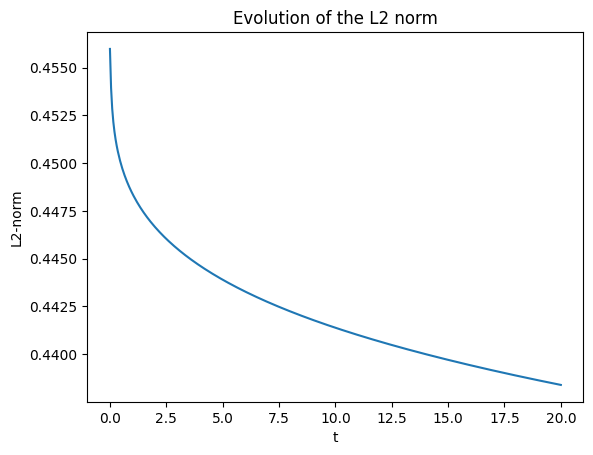

In [46]:
plt.plot(time,l2norm)
plt.title('Evolution of the L2 norm')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXW_step/LAXW_L2.png', dpi=200);

### Changing number of points

In [47]:
L = 10.0
nx = 1001
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

u_initial = np.heaviside(x-4,1)-np.heaviside(x-6,0)
u_current = u_initial.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:  
    u_next = u_current -a*(dt)/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + (0.5)*((a*(dt)/(dx))**2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1)) 
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 1001
dx= 0.01
dt= 0.005
Number of iterations= 4000.0


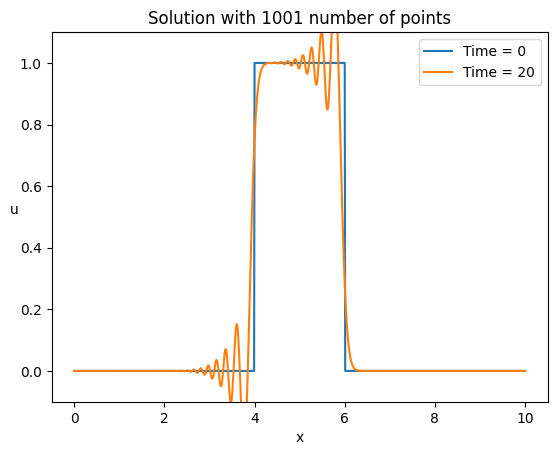

In [48]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with 1001 number of points')
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./LAXW_step/LAXW_sol_1001.png', dpi=200)

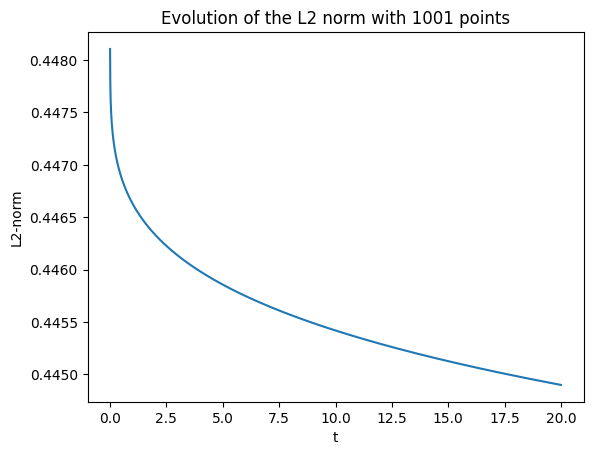

In [49]:
plt.plot(time,l2norm)
plt.title('Evolution of the L2 norm with 1001 points')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXW_step/LAXW_norm_1001.png', dpi=200);

### Changing Courant factor

In [50]:
L = 10.0
nx = 101
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.999
dt = cf*dx/abs(a)
t_final = 20

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

u_initial = np.heaviside(x-4,1)-np.heaviside(x-6,0)
u_current = u_initial.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:  
    u_next = u_current -a*(dt)/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + (0.5)*((a*(dt)/(dx))**2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 101
dx= 0.1
dt= 0.0999
Number of iterations= 200.2002002002002


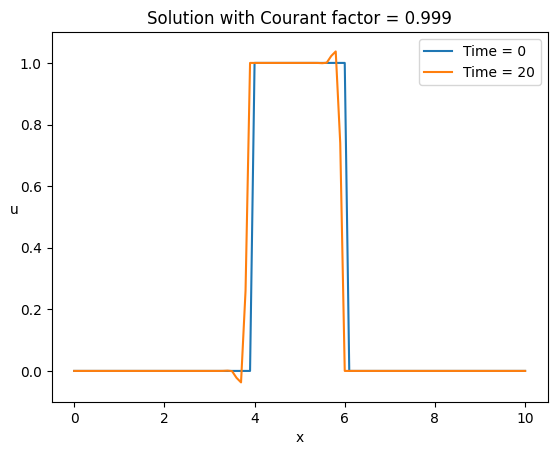

In [51]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with Courant factor = 0.999')
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./LAXW_step/LAXW_sol_cf99.png', dpi=200)

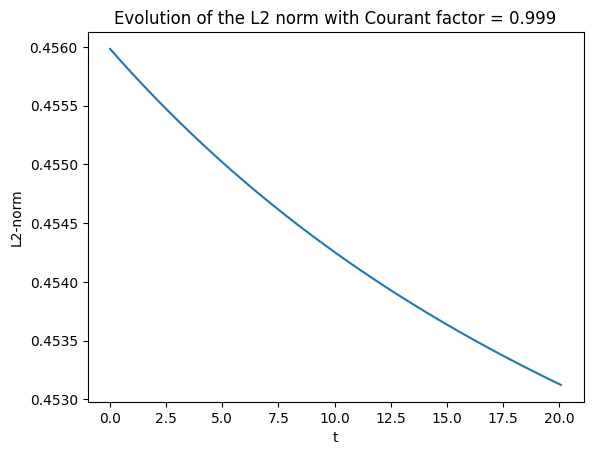

In [52]:
plt.plot(time,l2norm)
plt.title('Evolution of the L2 norm with Courant factor = 0.999')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXW_step/LAXW_norm_cf99.png', dpi=200);